## Time Series EDA Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
import prepare as pr

In [3]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)


Do your work for this exercise in a notebook named `explore.ipynb`. Use the techniques in the lesson to explore the **store item demand** dataset and the **opsd** dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

**Note: When resampling data, use a `mean()` aggregation method.**

### Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.

In [4]:
store = pr.acquire_store_data()

In [5]:
store = pr.wrangle_store_data(store)

**1. Using a human-based approach, split your dataset into train and test sets.**

**2. Visualize your train-test split.**

In [6]:
str(store.index.min()), str(store.index.max())

('2013-01-01 00:00:00', '2017-12-31 00:00:00')

In [7]:
store.head(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92


In [8]:
train = store[:'2016']

In [9]:
test = store.loc['2017']

In [10]:
train.tail(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2016-12-31,1,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,695341,45,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,405.9
2016-12-31,7,23,70670009658,70670009658,Reese,Reese Mandarin Oranges Segments In Light Syrup,1.78,414137,20,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,Saturday,35.6


In [11]:
test.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2017-01-01,6,14,41167300121,41167300121,Pamprin,Pamprin Maximum Strength Multi-symptom Menstru...,7.54,247972,47,1015 S WW White Rd,78220,San Antonio,TX,January,Sunday,354.38
2017-01-01,8,31,652790100226,652790100226,Zhenas Gypsy Tea,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,4.21,562044,62,15000 San Pedro Ave,78232,San Antonio,TX,January,Sunday,261.02


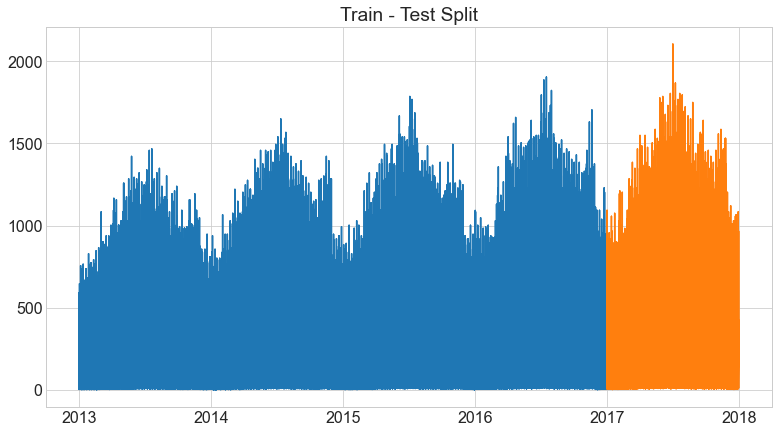

In [12]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.title('Train - Test Split')
plt.show()

Only use your train data set to perform the following tasks:

**3. Resample your data and visualize it.**

In [13]:
# create a Series of the target variable with date index
y = train.sales_total

In [15]:
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

In [20]:
y.resample('D').mean()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
                ...    
2016-12-27    207.31578
2016-12-28    210.62788
2016-12-29    226.44370
2016-12-30    240.06728
2016-12-31    256.01862
Freq: D, Name: sales_total, Length: 1461, dtype: float64

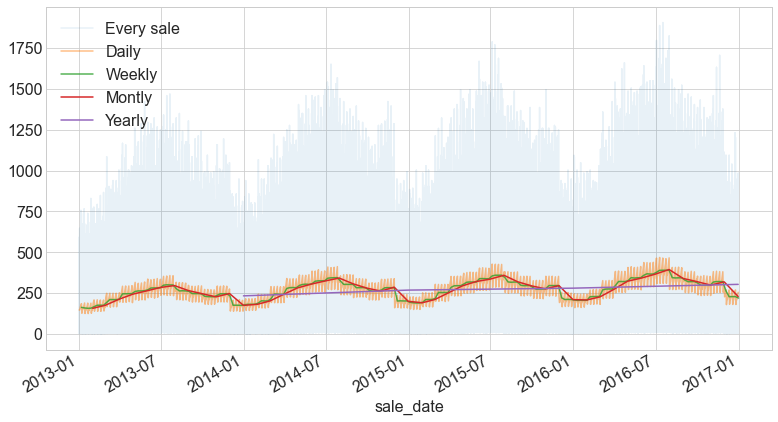

In [23]:
y.plot(alpha=.1, label='Every sale')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

4. Creating a rolling (moving) average of your data and visualize it.

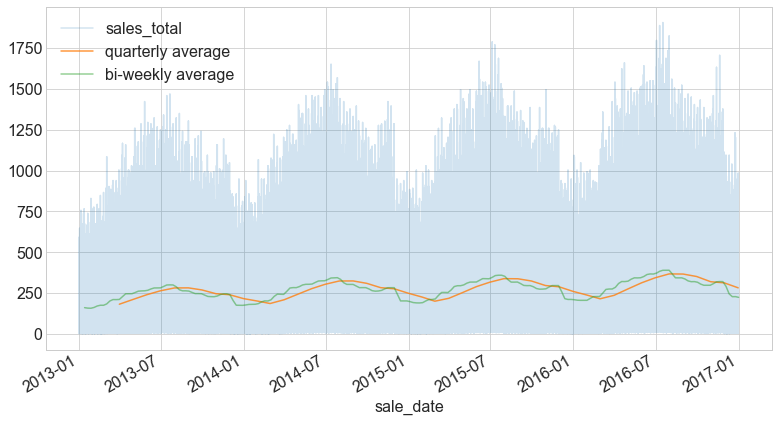

In [28]:
y.plot(alpha=.2)#, label='Hourly')
#y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('M').mean().rolling(3).mean().plot(alpha=.8, label='quarterly average')
y.resample('W').mean().rolling(2).mean().plot(alpha=.5, label='bi-weekly average')
plt.legend()
plt.show()

**5. Plot the difference in sales from one day to the next.**

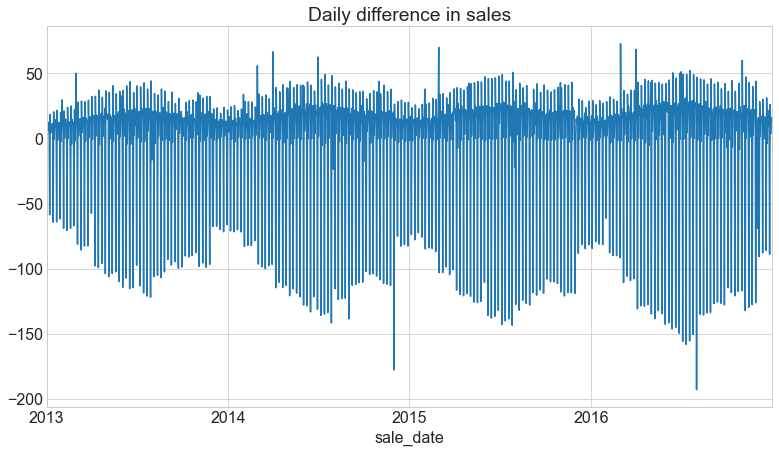

In [30]:
y.resample('D').mean().diff().plot(title='Daily difference in sales');

**6. Plot the % difference in sales from one day to the next.**

In [31]:
y_day = y.resample('D').mean()

In [32]:
y_day

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
                ...    
2016-12-27    207.31578
2016-12-28    210.62788
2016-12-29    226.44370
2016-12-30    240.06728
2016-12-31    256.01862
Freq: D, Name: sales_total, Length: 1461, dtype: float64

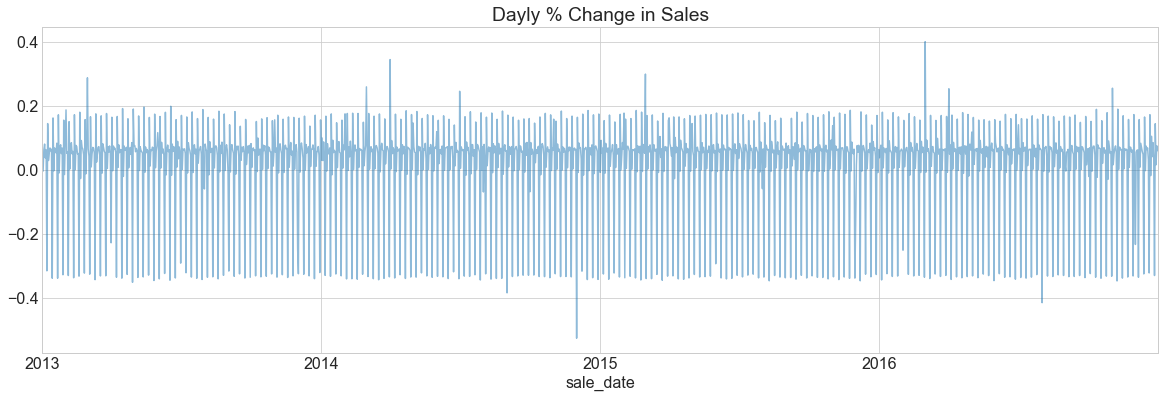

In [55]:
plt.figure(figsize = (20, 6))
(y_day.diff() / y_day.shift()).plot(alpha=.5, title='Dayly % Change in Sales');

**6. Plot the % difference in sales from one week to the next.**

In [36]:
y_week = y.resample('W').mean()

In [37]:
y_week.head()

sale_date
2013-01-06    163.589167
2013-01-13    159.981203
2013-01-20    157.946720
2013-01-27    158.545383
2013-02-03    167.585014
Freq: W-SUN, Name: sales_total, dtype: float64

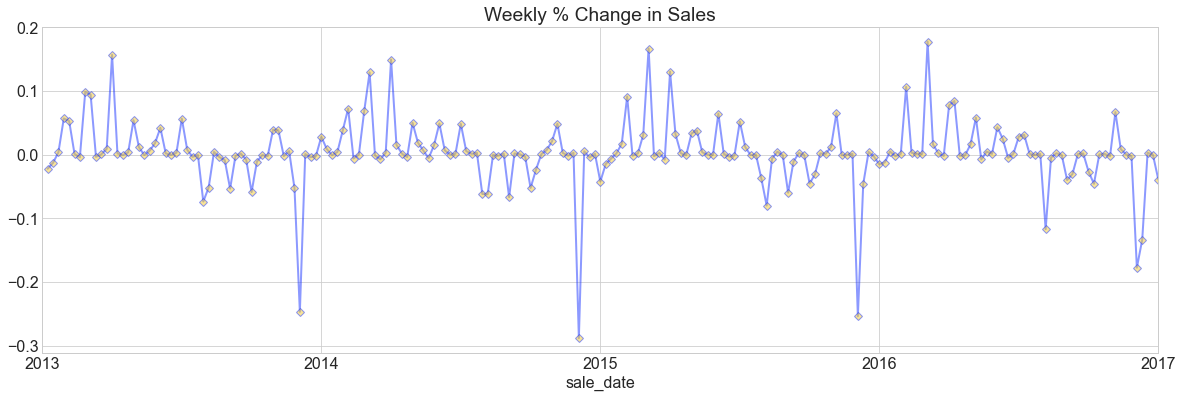

In [51]:
plt.figure(figsize = (20, 6))
(y_week.diff() / y_week.shift()).plot(alpha=.5, lw=2, c='#1a34ff', 
                                      marker='D', mfc='#f2cb30', title='Weekly % Change in Sales');

**7. Plot the % difference in sales from one month to the next.**

In [52]:
y_month = y.resample('M').mean()

In [53]:
y_month.head()

sale_date
2013-01-31    157.894723
2013-02-28    176.411855
2013-03-31    214.181650
2013-04-30    244.460082
2013-05-31    264.663123
Freq: M, Name: sales_total, dtype: float64

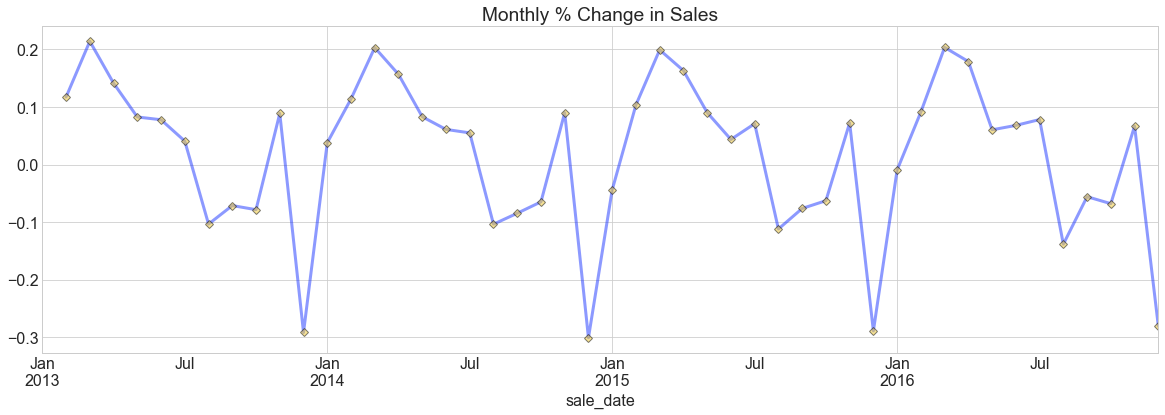

In [56]:
plt.figure(figsize = (20, 6))
(y_month.diff() / y_month.shift()).plot(alpha=.5, lw=3, c='#1a34ff', 
                                      marker='D', mfc='#f2cb30',mec='black', title='Monthly % Change in Sales');

<Figure size 1440x432 with 0 Axes>

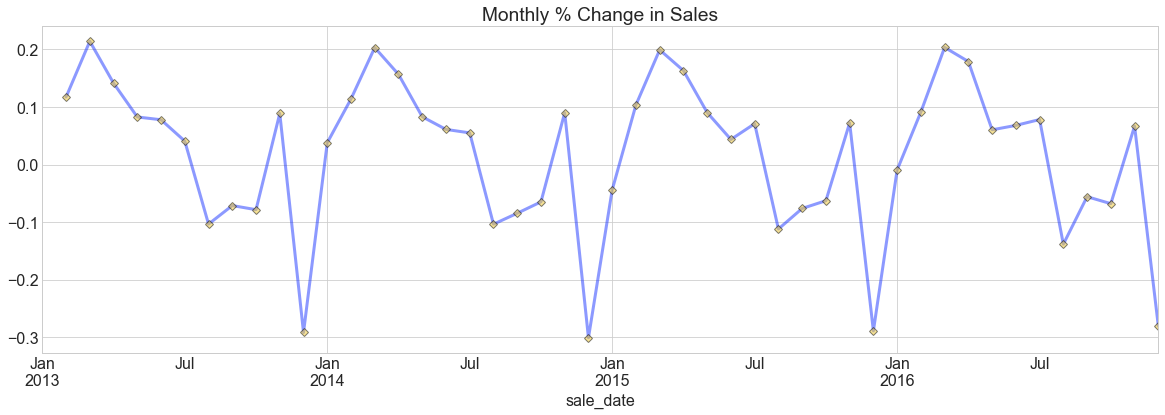

In [93]:

plt.figure(figsize = (20, 6))
fig, ax = plt.subplots()

# instanciate a figure and ax object
# annotate is a method that belongs to axes
(y_month.diff() / y_month.shift()).plot(alpha=.5, lw=3, c='#1a34ff', 
                                      marker='D', mfc='#f2cb30',mec='black', 
                                      title='Monthly % Change in Sales', figsize=(20,6));

## controls the extent of the plot.
#offset = 1.0 
#ax.set_xlim(min(x)-offset, max(x)+ offset)
#ax.set_ylim(min(y)-offset, max(y)+ offset)

# loop through each x,y pair
for i, j in zip(y_month.index, y_month):
    ax.annotate(i.strftime('%b'),  xy=(i, j))
    #ax.text(i, j, i.strftime('%b'))
plt.show()

**8. Visualize an autocorrelation plot on a weekly resampling.**

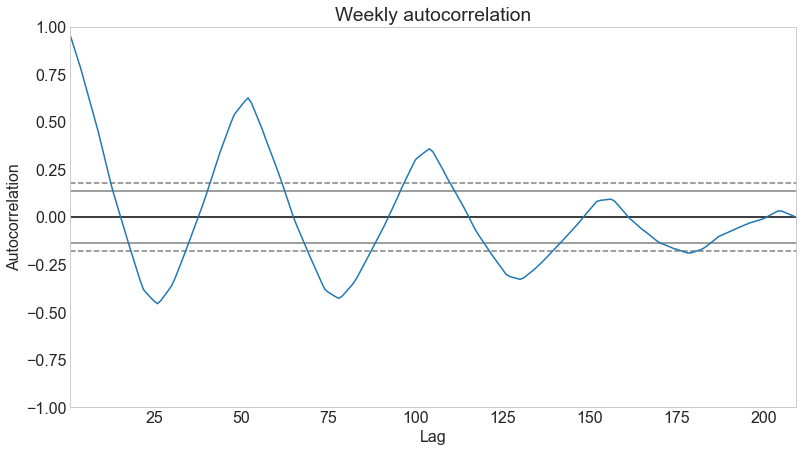

In [71]:
pd.plotting.autocorrelation_plot(y_week)
plt.title('Weekly autocorrelation');

**9. Visualize a seasonal decomposition plot on a weekly resampling.**

In [72]:
result = sm.tsa.seasonal_decompose(y_week)

In [79]:
result.seasonal.head()

sale_date
2013-01-06   -77.434789
2013-01-13   -79.225757
2013-01-20   -79.904284
2013-01-27   -80.259357
2013-02-03   -77.352692
Freq: W-SUN, Name: seasonal, dtype: float64

In [81]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.tail() 

,y,trend,seasonal,resid
sale_date,,,,
2016-12-04,263.768997,NaN,-69.599576,NaN
2016-12-11,228.559894,NaN,-73.100878,NaN
2016-12-18,229.298643,NaN,-73.857448,NaN
2016-12-25,229.231000,NaN,-74.634547,NaN
2017-01-01,220.279177,NaN,-77.434789,NaN


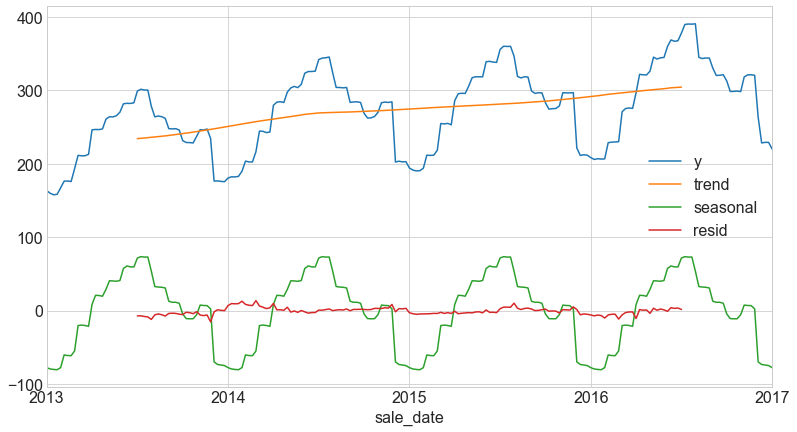

In [85]:
decomposition.plot();

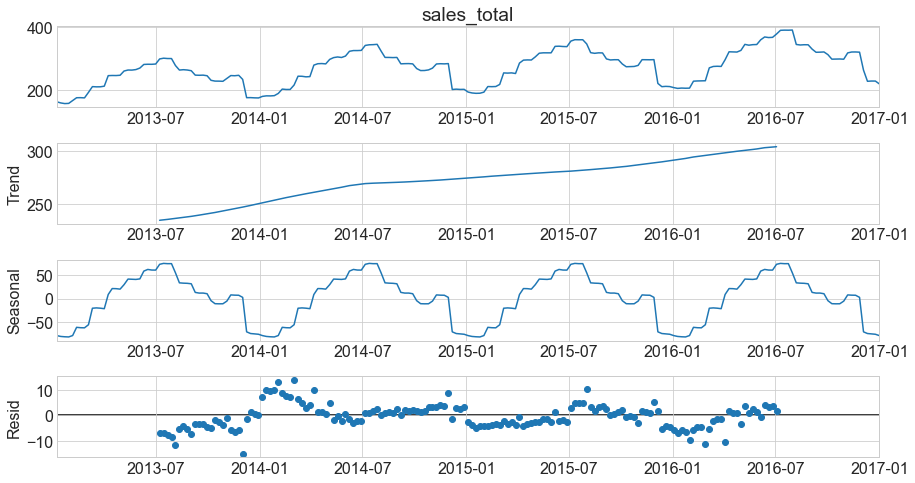

In [84]:
result.plot();

### OPS data
Load your OPS data using your acquire and/or prepare functions.
1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test. 

In [86]:
ops = pr.get_energy_data()

In [94]:
ops_train = ops[:'2013']
ops_test = ops['2014':]

In [96]:
ops_train.head(1)

,consumption,wind,solar,wind_and_solar,month
date,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January


Only use the train data set to perform the following tasks:

**2. Visualize your train-test split.**

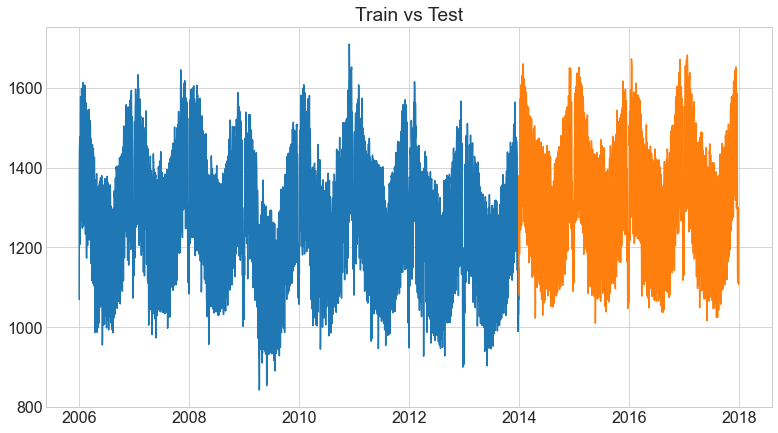

In [99]:
plt.plot(ops_train.index, ops_train.consumption)
plt.plot(ops_test.index, ops_test.consumption)
plt.title('Train vs Test')
plt.show()

**3. Plot the consumption, wind, and solar data on the same chart.**

In [101]:
consumption = ops_train.consumption
wind = ops_train.wind
solar = ops_train.solar
wind_and_solar = ops_train.wind_and_solar

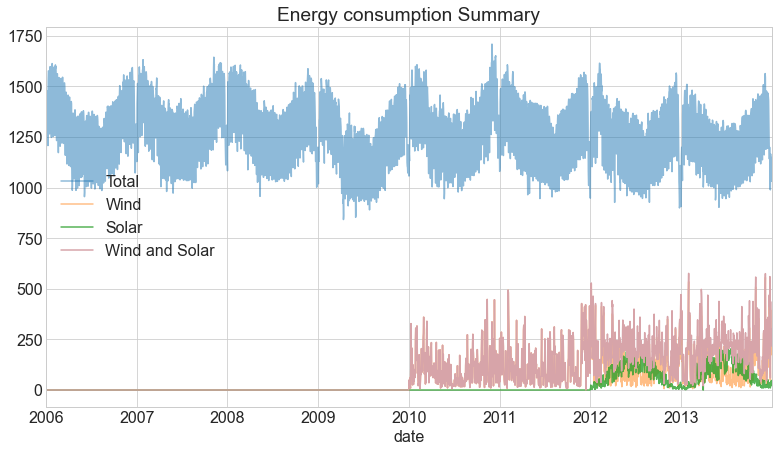

In [107]:
consumption.plot(alpha=.5, label='Total')
wind.plot(alpha=.5, label='Wind')
solar.plot(alpha=.8, label='Solar')
wind_and_solar.plot(c='#d7a4a9',label='Wind and Solar')
plt.title('Energy consumption Summary')
plt.legend()
plt.show()

**4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.**

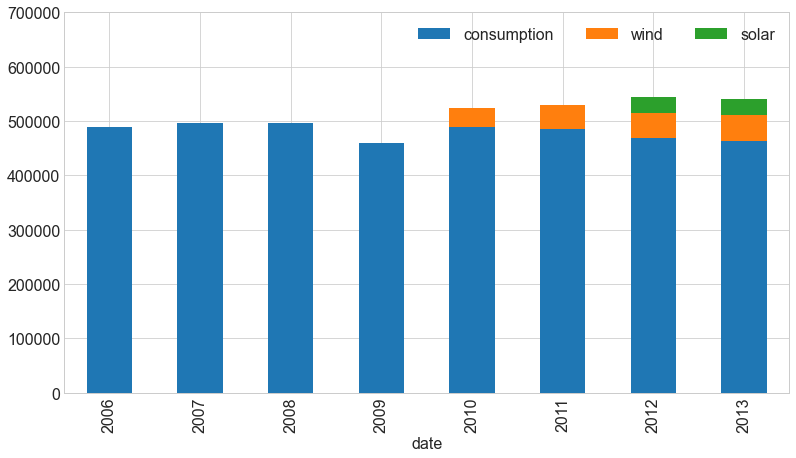

In [259]:

# lets plot the three power sources as stacked bar chart:

ax = ops_train[['consumption', 'wind', 'solar']].resample('Y').sum().plot.bar(stacked = True)
ax.set_ylim(0, 700000)
ax.legend(ncol = 3)

labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

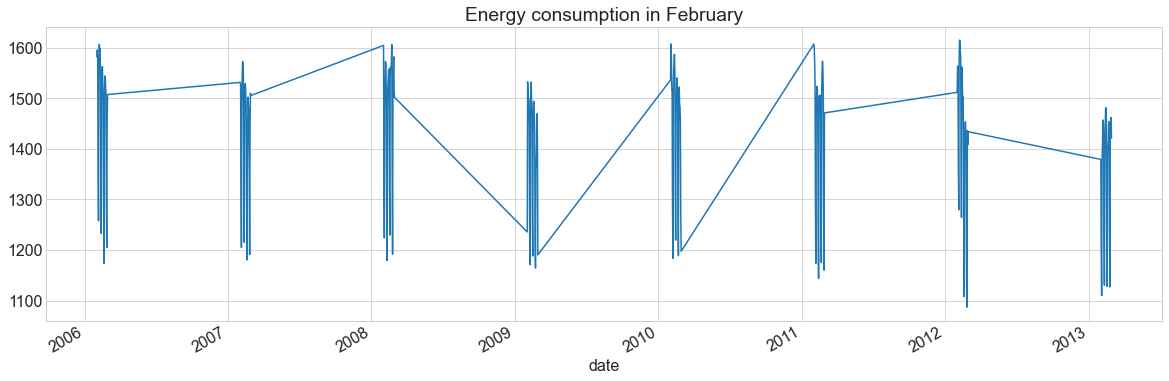

In [112]:
plt.figure(figsize=(20, 6))
ops_train[ops_train.month == 'February'].consumption.plot()
plt.title('Energy consumption in February');

**5. Resample the consumption data to monthly and plot it.**

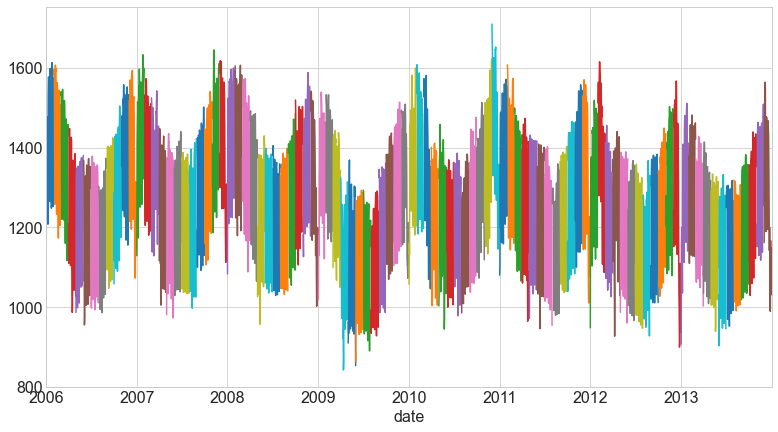

In [115]:
consumption.resample('M').plot();

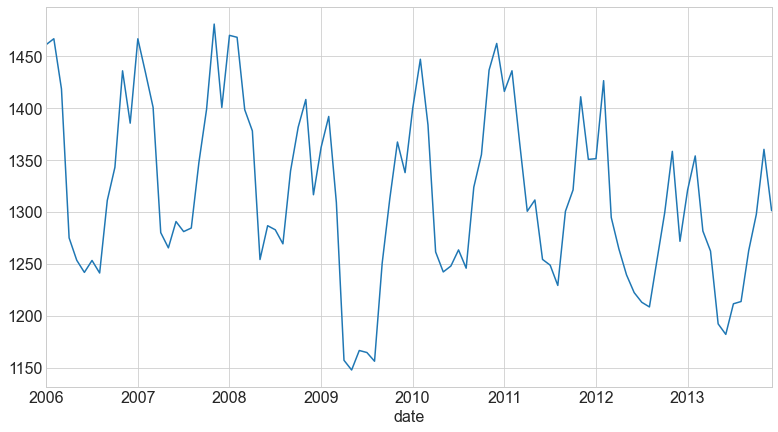

In [117]:
consumption.resample('M').mean().plot();

**6. Resample the consumption data to yearly and plot it.**

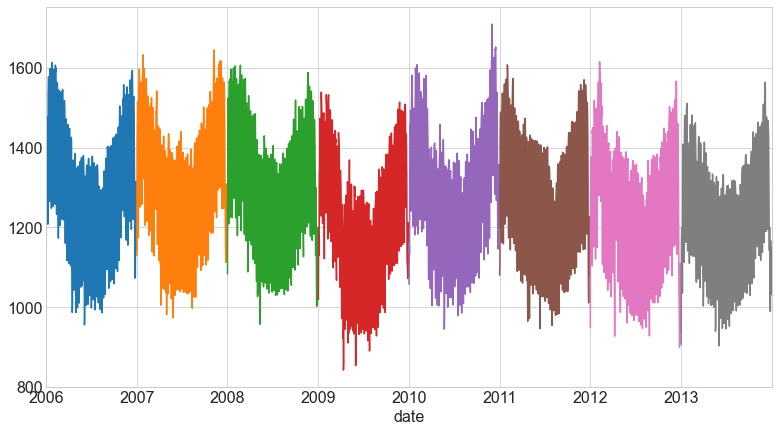

In [116]:
consumption.resample('Y').plot();

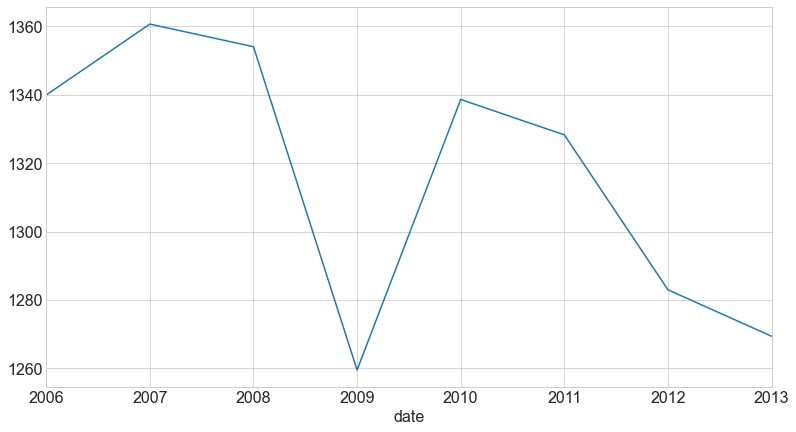

In [123]:
consumption.resample('Y').mean().plot();

#### BONUS:

**7. Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.**

In [128]:
cons = pd.DataFrame(consumption)

In [165]:
cons.loc[:,'mon'] = cons.index.strftime('%b')

In [166]:
cons.head(1)

,consumption,mon,wd,year
date,,,,
2006-01-01,1069.184,Jan,Sun,2006


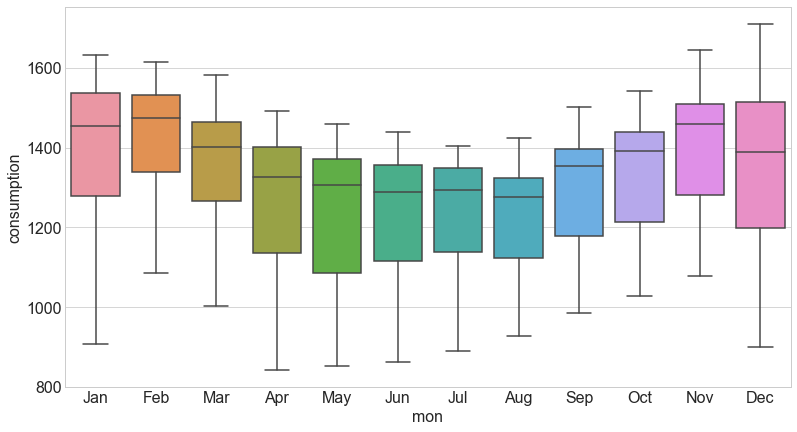

In [167]:
# boxplot for each month
sns.boxplot(data = cons, x = 'mon', y = 'consumption');

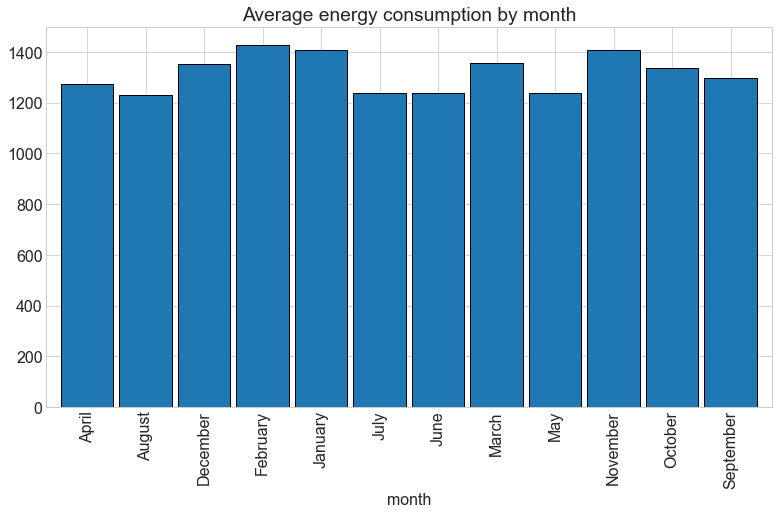

In [168]:

ops_train.groupby('month').mean().consumption.plot.bar(width=.9, ec='black')
plt.title('Average energy consumption by month')
plt.show()

**8. Group the consumption data by weekday and create a boxplot treating the weekday component as a separate categorical feature.**

In [169]:
cons.loc[:,'wd'] = cons.index.strftime('%a')

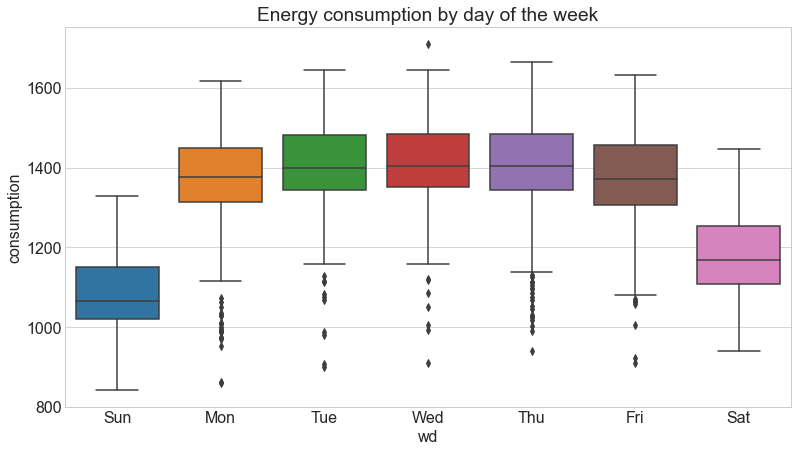

In [170]:
sns.boxplot(data=cons, x='wd', y='consumption')
plt.title('Energy consumption by day of the week');

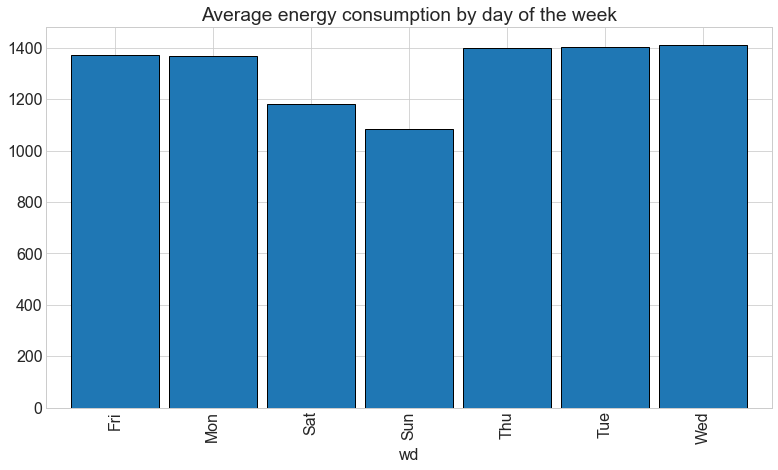

In [171]:
cons.groupby('wd').mean().consumption.plot.bar(width=.9, ec='black')
plt.title('Average energy consumption by day of the week')
plt.show()

**9. Create a subseasonal plot by month of your consumption data.**

In [172]:
cons['year'] = cons.index.year

In [184]:
# This is actually the same pivot table as above, but months are on the top and years are on the left
table = ops_train.consumption.groupby([ops_train.index.year, ops_train.index.month]).mean().unstack()
table

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645


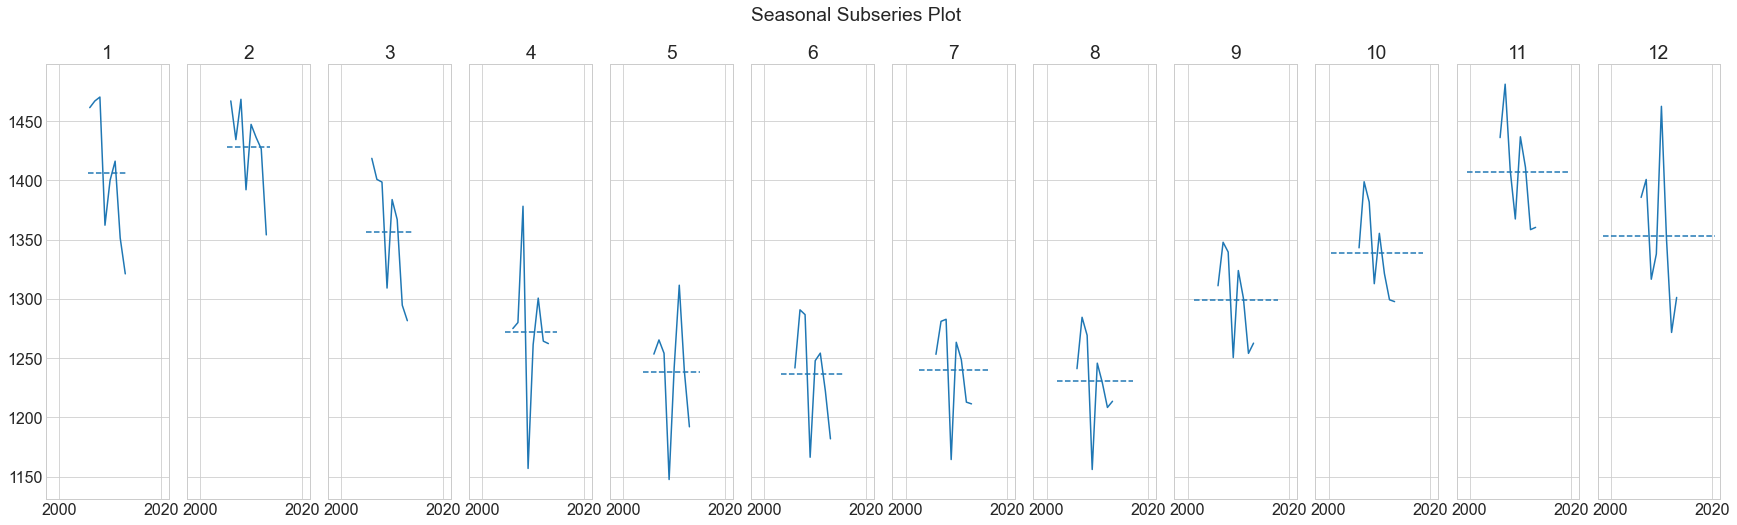

In [193]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(30, 8))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0.15)

**10. Create one or two visualizations that helps answer the follow questions: How does wind production/consumption vary within a year? How does wind production/consumption vary from year to year?**

In [203]:
m =['January', 'February', 'March', 'April', 'May', 
         'June', 'July', 'August', 'September', 'October', 'November', 'December']
ops_month = ops_train.groupby('month').mean()

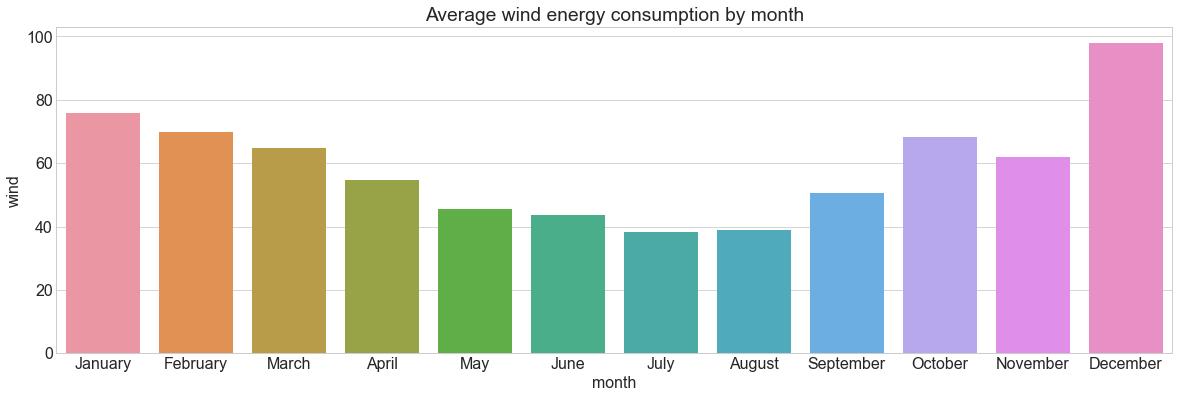

In [205]:
plt.figure(figsize=(20, 6))
sns.barplot(data=ops_month, x=ops_month.index, y = 'wind',
           order = m)
plt.title('Average wind energy consumption by month')
plt.show()

In [244]:
wind_by_year = ops_train.resample('Y').mean().loc['2010':]

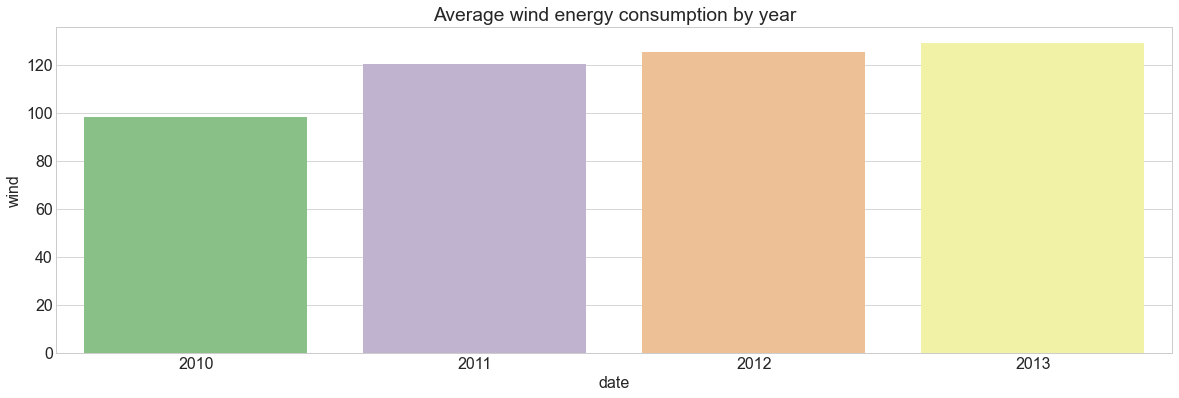

In [257]:
#wind_by_year.wind.plot.bar()
plt.figure(figsize=(20, 6))
sns.barplot(data = wind_by_year, x = wind_by_year.index.year, y= 'wind', palette='Accent')
plt.title('Average wind energy consumption by year')
plt.show()

**11. Create one or two visualizations that helps answer the follow questions: How does solar production/consumption vary within a year? How does solar production/consumption vary from year to year?**

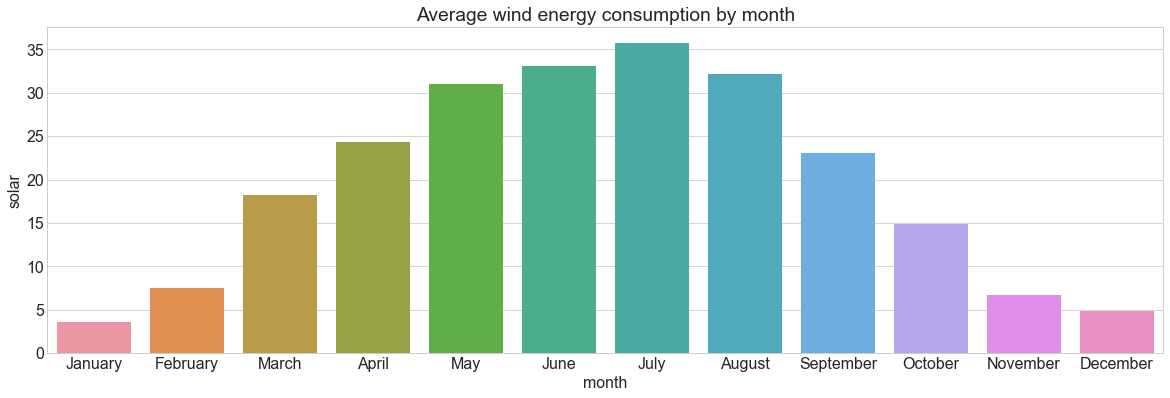

In [246]:
plt.figure(figsize=(20, 6))
sns.barplot(data=ops_month, x=ops_month.index, y = 'solar',
           order = m)
plt.title('Average wind energy consumption by month')
plt.show()

In [248]:
ops_by_year = ops_train.resample('Y').mean()

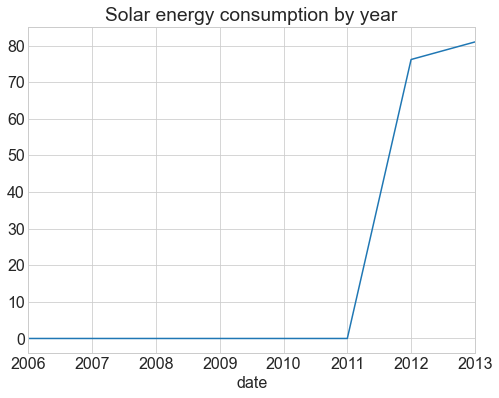

In [256]:
ops_by_year.solar.plot(figsize=(8,6), title='Solar energy consumption by year');

**12. Plot a time series decomposition for your consumption data and note your takeaways.**

**13. Create an autocorrelation plot of a weekly resampling of the consumption data.**